
# Joyce's Final Project

## An analysis of the renewable energy coverage from MBB (McKinsey, BCG, and Bain) Consulting Companies 

In [2]:
import re
from pathlib import Path

folder_path = "ENVART/"

sample_size = 0

file = open("envartttr-overall.csv", mode="w", encoding="utf-8")

file.write('"Text","Types","Tokens","TTR"\n')
#create columns

for file_path in sorted(Path(folder_path).glob('*.txt')):
    
    text = open(file_path, encoding='utf-8').read()
    print(text)
    if len(text)==0:
        print("empty string")
        break
    
    text = re.sub("[^a-zA-Z0-9]", " ", text)
    
    text_words = text.split()

    tokens = len(text_words)
    print(sample_size, tokens)
    if sample_size == 0 or tokens < sample_size:
        sample_size = tokens
        print(sample_size)
    
    unique_words = []
    
    for word in text_words:
        word = word.lower()

        if word not in unique_words:
            unique_words.append(word)
            
    types = len(unique_words)
    
    ttr = (types / tokens) * 100

    file.write(f'"{file_path.stem}",{types},{tokens},{ttr}\n')
file.close()


file = open("ttr-standardized.csv", mode="w", encoding="utf-8")
file.write('"Text","Types","Tokens","TTR"\n')
for file_path in sorted(Path(folder_path).glob('*.txt')):
    text = open(file_path, encoding='utf-8').read()
    text = re.sub("[^a-zA-Z0-9]", " ", text)


    text_words = text.split()

    text_words_standardized = text_words[:sample_size] 

    tokens_standardized = len(text_words_standardized)
    if tokens_standardized==0:
        print("empty string")
        ##print(text_words, text_words_standardized)
        print(len(text_words))
        print(len(text_words_standardized))
        print(sample_size)
        break


    unique_words_standardized = []
    
    for word in text_words_standardized:
        word = word.lower()
        if word not in unique_words_standardized:
            unique_words_standardized.append(word)
            
            
    types_standardized = len(unique_words_standardized)
    
    ttr_standardized = (types_standardized / tokens_standardized) * 100
    
    file.write(f'"{file_path.stem}",{types_standardized},{tokens_standardized},{ttr_standardized}\n')

file.close()

﻿Increase reliability, improve customer experience and reduce costs by identifying the most meaningful T&D investments. By Dedra Casey, Martha Eggenberger, Jason Glickman and Pratap Mukharji Grid Modernization: Invest Where It Matters Most Dedra Casey is a manager and Pratap Mukharji a partner in Bain’s Atlanta office. Martha Eggenberger is a principal in Toronto, and Jason Glickman is a Bain partner in San Francisco. All four work with Bain’s Global Utilities practice, which Jason leads in the Americas. Net Promoter®, Net Promoter System®, Net Promoter Score® and NPS® are registered trademarks of Bain & Company, Inc., Fred Reichheld and Satmetrix Systems, Inc. Copyright © 2018 Bain & Company, Inc. All rights reserved. 1 Grid Modernization: Invest Where It Matters Most At a Glance Utilities have underinvested in their transmission and distribution infrastructure for decades, but investment in the grid is on the rise. Strategic T&D investments improve reliability, which in turn reduces 

In [3]:
import pandas as pd    
ENVARTnonstandard = pd.read_csv('envartttr-overall.csv')   
ENVARTnonstandard.sort_values(by='TTR') 

,Text,Types,Tokens,TTR
4,bain2022,3677,26518,13.866053
3,bain2021,3368,22956,14.671546
10,mckinsey2018,1386,5515,25.131460
6,bcg2019,1191,4470,26.644295
7,bcg2020,1191,4470,26.644295
11,mckinsey2019,1056,3403,31.031443
0,bain2018,745,2325,32.043011
5,bcg2018,1010,3146,32.104259
8,bcg2021,1064,3233,32.910609
9,bcg2022,1064,3233,32.910609


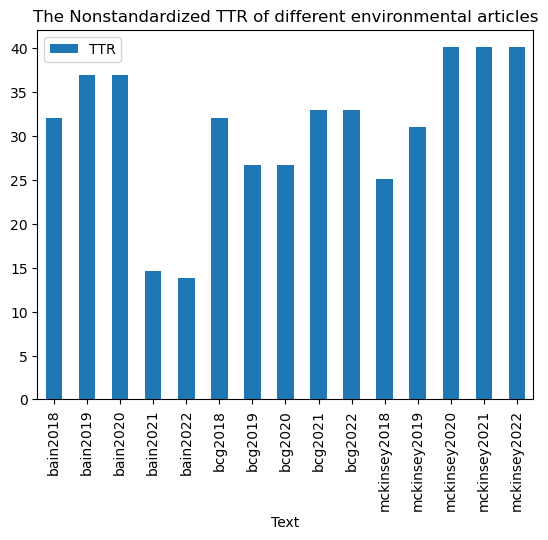

In [4]:
ENVARTnonstandard.bar = ENVARTnonstandard.plot(x = 0, y = 3, kind = 'bar', title = 'The Nonstandardized TTR of different environmental articles')

In [5]:
import pandas as pd    
ENVART = pd.read_csv('ttr-standardized.csv')   
ENVART.sort_values(by='TTR') 

,Text,Types,Tokens,TTR
0,bain2018,569,1719,33.100640
10,mckinsey2018,644,1719,37.463642
4,bain2022,646,1719,37.579988
5,bcg2018,654,1719,38.045375
1,bain2019,658,1719,38.278069
2,bain2020,658,1719,38.278069
6,bcg2019,660,1719,38.394415
7,bcg2020,660,1719,38.394415
3,bain2021,661,1719,38.452589
11,mckinsey2019,674,1719,39.208842


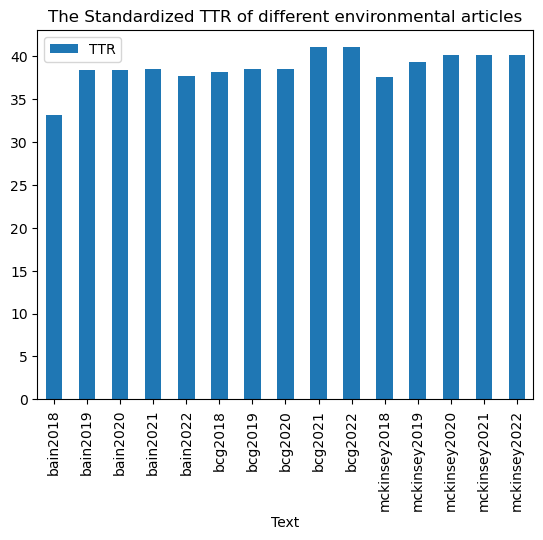

In [6]:
ENVART.bar = ENVART.plot(x = 0, y = 3, kind = 'bar', title = 'The Standardized TTR of different environmental articles')

In [14]:
envartttr_overall_df = pd.read_csv("envartttr-overall.csv")
envartttr_overall_df

ttr_standardized_df = pd.read_csv("ttr-standardized.csv")
ttr_standardized_df

envartttr_merged_df = pd.merge(envartttr_overall_df, ttr_standardized_df, on="Text")
envartttr_merged_df

,Text,Types_x,Tokens_x,TTR_x,Types_y,Tokens_y,TTR_y
0,bain2018,745,2325,32.043011,569,1719,33.100640
1,bain2019,741,2008,36.902390,658,1719,38.278069
2,bain2020,741,2008,36.902390,658,1719,38.278069
3,bain2021,3368,22956,14.671546,661,1719,38.452589
4,bain2022,3677,26518,13.866053,646,1719,37.579988
5,bcg2018,1010,3146,32.104259,654,1719,38.045375
6,bcg2019,1191,4470,26.644295,660,1719,38.394415
7,bcg2020,1191,4470,26.644295,660,1719,38.394415
8,bcg2021,1064,3233,32.910609,704,1719,40.954043
9,bcg2022,1064,3233,32.910609,704,1719,40.954043


In [21]:
mckinsey2022 = open("mckinsey2022.txt", encoding="utf-8").read()
mckinsey2022_blob = TextBlob(mckinsey2022)
mckinsey2022_sentences_blob = mckinsey2022_blob.sentences
mckinsey2022_sentences = []
mckinsey2022_polarities = []
mckinsey2022_subjectivities = []
    
for sentence in mckinsey2022_sentences_blob:
    sentence_processed = (" ".join(sentence.words))
    sentence_blob = TextBlob(sentence_processed)
    mckinsey2022_sentences.append(sentence_processed)
    mckinsey2022_polarities.append(sentence_blob.polarity)
    mckinsey2022_subjectivities.append(sentence_blob.subjectivity)
    
mckinsey2022_df = pd.DataFrame({
    'sentence': mckinsey2022_sentences,
    'polarity': mckinsey2022_polarities,
    'subjectivity': mckinsey2022_subjectivities
})

mckinsey2022_blob.sentiment

Sentiment(polarity=0.12483628052275596, subjectivity=0.45802029254898097)

In [23]:
bcg2022 = open("bcg2022.txt", encoding="utf-8").read()
bcg2022_blob = TextBlob(bcg2022)
bcg2022_sentences_blob = bcg2022_blob.sentences
bcg2022_sentences = []
bcg2022_polarities = []
bcg2022_subjectivities = []
    
for sentence in bcg2022_sentences_blob:
    sentence_processed = (" ".join(sentence.words))
    sentence_blob = TextBlob(sentence_processed)
    bcg2022_sentences.append(sentence_processed)
    bcg2022_polarities.append(sentence_blob.polarity)
    bcg2022_subjectivities.append(sentence_blob.subjectivity)
    
bcg2022_df = pd.DataFrame({
    'sentence': bcg2022_sentences,
    'polarity': bcg2022_polarities,
    'subjectivity': bcg2022_subjectivities
})

bcg2022_blob.sentiment

Sentiment(polarity=0.10583379386570879, subjectivity=0.44362268936737026)

In [24]:
bain2022 = open("bain2022.txt", encoding="utf-8").read()
bain2022_blob = TextBlob(bain2022)
bain2022_sentences_blob = bain2022_blob.sentences
bain2022_sentences = []
bain2022_polarities = []
bain2022_subjectivities = []
    
for sentence in bain2022_sentences_blob:
    sentence_processed = (" ".join(sentence.words))
    sentence_blob = TextBlob(sentence_processed)
    bain2022_sentences.append(sentence_processed)
    bain2022_polarities.append(sentence_blob.polarity)
    bain2022_subjectivities.append(sentence_blob.subjectivity)
    
bain2022_df = pd.DataFrame({
    'sentence': bain2022_sentences,
    'polarity': bain2022_polarities,
    'subjectivity': bain2022_subjectivities
})

bain2022_blob.sentiment

Sentiment(polarity=0.13145370465037545, subjectivity=0.4223800255551174)